In [1]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
import pandas as pd
import numpy as np
import os
import re
datapath = r'E:\Pranay\Training\Linear_Regression\Linr_Reg_Data_Set'
os.chdir(datapath)
import seaborn as sns

In [2]:
sales_data=pd.read_csv("sales_data.csv")

In [3]:
sales_data.head(5)

,system_calendar_key_N,product_id,sales_dollars_value,sales_units_value,sales_lbs_value
0,20160109,1,13927.0,934,18680
1,20160109,3,10289.0,1592,28646
2,20160109,4,357.0,22,440
3,20160109,6,23113.0,2027,81088
4,20160109,7,23177.0,3231,58164


In [4]:
sales_data.tail(5)

,system_calendar_key_N,product_id,sales_dollars_value,sales_units_value,sales_lbs_value
4526177,20181027,47536,8.0,2,3
4526178,20181027,47539,391.0,39,68
4526179,20181027,47543,105.0,59,48
4526180,20181027,47544,3720.0,1246,4361
4526181,20181027,47545,1729.0,2016,378


In [5]:
sales_data.shape

(4526182, 5)

In [6]:
sales_data.isnull().sum()

system_calendar_key_N    0
product_id               0
sales_dollars_value      0
sales_units_value        0
sales_lbs_value          0
dtype: int64

In [7]:
sales_data.describe().T

,count,mean,std,min,25%,50%,75%,max
system_calendar_key_N,4526182.0,2.017505e+07,10735.371398,20160109.0,20161231.0,20171209.0,20181103.0,20191005.0
product_id,4526182.0,2.885857e+04,15312.536560,1.0,15069.0,29981.0,41513.0,57317.0
sales_dollars_value,4526182.0,2.159454e+04,78180.565626,0.0,523.0,2655.0,11765.0,4395964.0
sales_units_value,4526182.0,5.160053e+03,26853.407825,1.0,80.0,403.0,1807.0,873998.0
sales_lbs_value,4526182.0,1.715339e+04,127340.124382,0.0,86.0,611.0,3770.0,11003100.0


In [8]:
sales_data.describe()

,system_calendar_key_N,product_id,sales_dollars_value,sales_units_value,sales_lbs_value
count,4.526182e+06,4.526182e+06,4.526182e+06,4.526182e+06,4.526182e+06
mean,2.017505e+07,2.885857e+04,2.159454e+04,5.160053e+03,1.715339e+04
std,1.073537e+04,1.531254e+04,7.818057e+04,2.685341e+04,1.273401e+05
min,2.016011e+07,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2.016123e+07,1.506900e+04,5.230000e+02,8.000000e+01,8.600000e+01
50%,2.017121e+07,2.998100e+04,2.655000e+03,4.030000e+02,6.110000e+02
75%,2.018110e+07,4.151300e+04,1.176500e+04,1.807000e+03,3.770000e+03
max,2.019100e+07,5.731700e+04,4.395964e+06,8.739980e+05,1.100310e+07


In [9]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4526182 entries, 0 to 4526181
Data columns (total 5 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   system_calendar_key_N  int64  
 1   product_id             int64  
 2   sales_dollars_value    float64
 3   sales_units_value      int64  
 4   sales_lbs_value        int64  
dtypes: float64(1), int64(4)
memory usage: 172.7 MB


In [10]:
from datetime import datetime

In [11]:
sales_data['system_calendar_key_N']=pd.to_datetime(sales_data['system_calendar_key_N'],format='%Y%m%d', errors='ignore')

In [12]:
print(sales_data.dtypes)

system_calendar_key_N    datetime64[ns]
product_id                        int64
sales_dollars_value             float64
sales_units_value                 int64
sales_lbs_value                   int64
dtype: object


In [13]:
sales_data.head()

,system_calendar_key_N,product_id,sales_dollars_value,sales_units_value,sales_lbs_value
0,2016-01-09,1,13927.0,934,18680
1,2016-01-09,3,10289.0,1592,28646
2,2016-01-09,4,357.0,22,440
3,2016-01-09,6,23113.0,2027,81088
4,2016-01-09,7,23177.0,3231,58164


In [14]:
sales_data.shape

(4526182, 5)

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
google_search_data=pd.read_csv("google_search_data.csv")

In [17]:
google_search_data.head()

,date,platform,searchVolume,Claim_ID,week_number,year_new
0,05-01-2014,google,349,916,1,2014
1,06-01-2014,google,349,916,2,2014
2,07-01-2014,google,697,916,2,2014
3,10-01-2014,google,349,916,2,2014
4,20-01-2014,google,697,916,4,2014


In [18]:
google_search_data.tail()

,date,platform,searchVolume,Claim_ID,week_number,year_new
181560,05-09-2019,walmart,125,980,36,2019
181561,22-09-2019,walmart,84,980,38,2019
181562,26-09-2019,walmart,42,980,39,2019
181563,15-07-2019,walmart,42,622,29,2019
181564,02-09-2019,walmart,42,689,36,2019


In [19]:
google_search_data['platform'].value_counts()

google     138115
amazon      23828
chewy       13352
walmart      6270
Name: platform, dtype: int64

In [20]:
google_search_data['year_new'].value_counts()

2018    51388
2019    38682
2017    27399
2016    22280
2015    21372
2014    20444
Name: year_new, dtype: int64

In [21]:
google_search_data.shape

(181565, 6)

In [22]:
google_search_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181565 entries, 0 to 181564
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   date          181565 non-null  object
 1   platform      181565 non-null  object
 2   searchVolume  181565 non-null  int64 
 3   Claim_ID      181565 non-null  int64 
 4   week_number   181565 non-null  int64 
 5   year_new      181565 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 8.3+ MB


In [23]:
google_search_data["date"]=pd.to_datetime(google_search_data["date"],format='%d-%m-%Y', errors='ignore')

In [24]:
google_search_data.isnull().sum()

date            0
platform        0
searchVolume    0
Claim_ID        0
week_number     0
year_new        0
dtype: int64

In [25]:
google_search_data.head()

,date,platform,searchVolume,Claim_ID,week_number,year_new
0,2014-01-05,google,349,916,1,2014
1,2014-01-06,google,349,916,2,2014
2,2014-01-07,google,697,916,2,2014
3,2014-01-10,google,349,916,2,2014
4,2014-01-20,google,697,916,4,2014


In [26]:
google_search_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181565 entries, 0 to 181564
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          181565 non-null  datetime64[ns]
 1   platform      181565 non-null  object        
 2   searchVolume  181565 non-null  int64         
 3   Claim_ID      181565 non-null  int64         
 4   week_number   181565 non-null  int64         
 5   year_new      181565 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 8.3+ MB


In [27]:
print(google_search_data['date'].dtype)

datetime64[ns]


In [28]:
google_search_data.sort_values(by="date",ascending=True, inplace=True)

In [29]:
google_search_data.head()

,date,platform,searchVolume,Claim_ID,week_number,year_new
1147,2014-01-01,google,889,922,1,2014
2365,2014-01-01,google,240,707,1,2014
3802,2014-01-01,google,1131,901,1,2014
13726,2014-01-01,google,1725,177,1,2014
1827,2014-01-01,google,2636,100,1,2014


In [30]:
google_search_data = google_search_data.reset_index(drop=True)

In [31]:
google_search_data.head()

,date,platform,searchVolume,Claim_ID,week_number,year_new
0,2014-01-01,google,889,922,1,2014
1,2014-01-01,google,240,707,1,2014
2,2014-01-01,google,1131,901,1,2014
3,2014-01-01,google,1725,177,1,2014
4,2014-01-01,google,2636,100,1,2014


In [32]:
themes_product_data=pd.read_csv("Theme_product_list.csv")

In [33]:
themes_product_data.shape

(91485, 2)

In [34]:
themes_product_data.head()

,PRODUCT_ID,CLAIM_ID
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [35]:
social_media_data=pd.read_excel('social_media_data.xlsx')

In [36]:
social_media_data.head(2)

,Theme Id,published_date,total_post
0,148.0,2015-01-10 00:00:00,76
1,148.0,2015-10-10 00:00:00,31


In [37]:
social_media_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533390 entries, 0 to 533389
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Theme Id        314879 non-null  float64
 1   published_date  533390 non-null  object 
 2   total_post      533390 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 12.2+ MB


In [38]:
social_media_data.shape

(533390, 3)

In [39]:
social_media_data.isnull().sum()

Theme Id          218511
published_date         0
total_post             0
dtype: int64

In [40]:
social_media_data = social_media_data.dropna(subset=['Theme Id'])

In [41]:
social_media_data.shape

(314879, 3)

In [42]:
social_media_data.reset_index(drop=True, inplace=True)

In [43]:
social_media_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314879 entries, 0 to 314878
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Theme Id        314879 non-null  float64
 1   published_date  314879 non-null  object 
 2   total_post      314879 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 7.2+ MB


In [44]:
social_media_data.head()

,Theme Id,published_date,total_post
0,148.0,2015-01-10 00:00:00,76
1,148.0,2015-10-10 00:00:00,31
2,148.0,2015-11-10 00:00:00,65
3,148.0,2015-12-10 00:00:00,88
4,148.0,10/13/2015,85


In [45]:
social_media_data['Theme Id']=social_media_data['Theme Id'].astype('int64') 

In [46]:
social_media_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314879 entries, 0 to 314878
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Theme Id        314879 non-null  int64 
 1   published_date  314879 non-null  object
 2   total_post      314879 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ MB


In [47]:
#social_media_data['published_date']=pd.to_datetime(social_media_data['published_date'])

In [48]:
product_manufacture_list=pd.read_csv("product_manufacturer_list.csv")

In [49]:
product_manufacture_list.head()

,PRODUCT_ID,Vendor,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1,Others,NaN,NaN,NaN,NaN,NaN
1,2,Others,NaN,NaN,NaN,NaN,NaN
2,3,Others,NaN,NaN,NaN,NaN,NaN
3,4,Others,NaN,NaN,NaN,NaN,NaN
4,5,Others,NaN,NaN,NaN,NaN,NaN


In [50]:
product_manufacture_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67175 entries, 0 to 67174
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PRODUCT_ID  67175 non-null  int64  
 1   Vendor      67175 non-null  object 
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.6+ MB


In [51]:
for col in product_manufacture_list.columns:
    print(col)

PRODUCT_ID
Vendor
Unnamed: 2
Unnamed: 3
Unnamed: 4
Unnamed: 5
Unnamed: 6


In [52]:
product_manufacture_list.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4","Unnamed: 5","Unnamed: 6"], axis=1, inplace=True)

In [53]:
product_manufacture_list = product_manufacture_list[['PRODUCT_ID','Vendor']]

In [54]:
product_manufacture_list.head()

,PRODUCT_ID,Vendor
0,1,Others
1,2,Others
2,3,Others
3,4,Others
4,5,Others


In [55]:
product_manufacture_list.isnull().sum()

PRODUCT_ID    0
Vendor        0
dtype: int64

In [56]:
product_manufacture_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67175 entries, 0 to 67174
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PRODUCT_ID  67175 non-null  int64 
 1   Vendor      67175 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [57]:
product_manufacture_list.shape

(67175, 2)

In [58]:
themes_list=pd.read_csv("Theme_list.csv")

In [59]:
themes_list.head()

,CLAIM_ID,Claim Name
0,0,No Claim
1,8,low carb
2,15,beans
3,16,cocoa
4,26,vanilla


In [60]:
themes_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CLAIM_ID    208 non-null    int64 
 1   Claim Name  208 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


In [61]:
themes_list.isnull().sum()

CLAIM_ID      0
Claim Name    0
dtype: int64

In [62]:
themes_list.shape

(208, 2)

In [63]:
themes_list['CLAIM_ID'].nunique()

208

In [64]:
themes_list['CLAIM_ID'].unique()

array([  0,   8,  15,  16,  26,  32,  38,  39,  40,  58,  59,  65,  73,
        75,  79,  80,  81, 100, 101, 120, 125, 138, 139, 142, 143, 144,
       145, 147, 148, 151, 152, 157, 158, 163, 171, 173, 177, 178, 185,
       186, 187, 191, 192, 193, 197, 207, 211, 220, 222, 224, 227, 228,
       287, 384, 385, 388, 393, 430, 432, 433, 437, 438, 440, 441, 916,
       650, 713, 979, 620, 543, 904, 754, 821, 984, 777, 670, 761, 780,
       941, 832, 608, 681, 913, 622, 738, 600, 601, 788, 867, 977, 928,
       813, 847, 702, 587, 842, 823, 743, 907, 974, 510, 747, 884, 931,
       803, 526, 860, 869, 870, 852, 541, 839, 634, 789, 618, 519, 576,
       844, 583, 606, 918, 716, 594, 889, 980, 930, 616, 901, 982, 556,
       741, 682, 558, 965, 657, 536, 507, 516, 981, 816, 555, 707, 944,
       903, 999, 677, 782, 959, 566, 659, 704, 915, 605, 632, 668, 732,
       770, 877, 958, 900, 970, 531, 929, 684, 967, 985, 964, 755, 683,
       799, 843, 948, 887, 937, 908, 737, 613, 615, 509, 922, 78

In [65]:
themes_list['Claim Name'].nunique()

208

In [66]:
themes_list['Claim Name'].unique()

array(['No Claim', 'low carb', 'beans', 'cocoa', 'vanilla', 'stroganoff',
       'cumin', 'high/source of protein', 'no additives/preservatives',
       'buckwheat', 'tutti frutti', 'ethical - not specific', 'brown ale',
       'french bisque', 'pheasant', 'whitebait', 'gmo free',
       'low calorie', 'peach', 'crab', 'nuts', 'venison', 'fruit',
       'convenience - easy-to-prepare', 'anchovy', 'pomegranate',
       'scallop', 'american gumbo', 'tuna', 'low sodium', 'low sugar',
       'french', 'chicken', 'ethical - packaging', 'cherry',
       'vitamin/mineral fortified', 'liver', 'red raspberry', 'cookie',
       'pollock', 'blueberry', 'bone health', 'prebiotic', 'poultry',
       'cheddar cheese', 'energy/alertness', 'halal', 'herbs', 'pizza',
       'american southwest style', 'salmon', 'beef hamburger', 'tilapia',
       'mackerel', 'peanut', 'lobster', 'sea salt', 'soy foods',
       'apple cinnamon', 'gingerbread', 'vegetarian', 'ethnic & exotic',
       'cream', 'berry', 'g

In [67]:
sales_data.head(2)

,system_calendar_key_N,product_id,sales_dollars_value,sales_units_value,sales_lbs_value
0,2016-01-09,1,13927.0,934,18680
1,2016-01-09,3,10289.0,1592,28646


In [68]:
social_media_data.head(2)

,Theme Id,published_date,total_post
0,148,2015-01-10 00:00:00,76
1,148,2015-10-10 00:00:00,31


In [69]:
social_media_data.rename(columns={'Theme Id':'CLAIM_ID'}, inplace=True)

In [70]:
social_media_data.head(2)

,CLAIM_ID,published_date,total_post
0,148,2015-01-10 00:00:00,76
1,148,2015-10-10 00:00:00,31


In [71]:
product_manufacture_list.head(2)

,PRODUCT_ID,Vendor
0,1,Others
1,2,Others


In [72]:
themes_list.head(2)

,CLAIM_ID,Claim Name
0,0,No Claim
1,8,low carb


In [73]:
themes_product_data.head(2)

,PRODUCT_ID,CLAIM_ID
0,1,0
1,2,0


In [74]:
google_search_data.head(2)

,date,platform,searchVolume,Claim_ID,week_number,year_new
0,2014-01-01,google,889,922,1,2014
1,2014-01-01,google,240,707,1,2014


In [75]:
sales_data.rename(columns={"product_id":"PRODUCT_ID"}, inplace=True)

In [76]:
sales_data.head(2)

,system_calendar_key_N,PRODUCT_ID,sales_dollars_value,sales_units_value,sales_lbs_value
0,2016-01-09,1,13927.0,934,18680
1,2016-01-09,3,10289.0,1592,28646


In [77]:
google_search_data.rename(columns={"Claim_ID":"CLAIM_ID"}, inplace=True)

In [78]:
google_search_data.head(2)

,date,platform,searchVolume,CLAIM_ID,week_number,year_new
0,2014-01-01,google,889,922,1,2014
1,2014-01-01,google,240,707,1,2014


In [79]:
#sales_data, product_manufacture_list, themes_product_data, 
sales_data.shape

(4526182, 5)

In [80]:
product_manufacture_list.shape

(67175, 2)

In [81]:
themes_product_data.shape

(91485, 2)

In [82]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4526182 entries, 0 to 4526181
Data columns (total 5 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   system_calendar_key_N  datetime64[ns]
 1   PRODUCT_ID             int64         
 2   sales_dollars_value    float64       
 3   sales_units_value      int64         
 4   sales_lbs_value        int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 172.7 MB


In [83]:
product_manufacture_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67175 entries, 0 to 67174
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PRODUCT_ID  67175 non-null  int64 
 1   Vendor      67175 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [84]:
themes_product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91485 entries, 0 to 91484
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   PRODUCT_ID  91485 non-null  int64
 1   CLAIM_ID    91485 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB


In [85]:
sales_data.head(2)

,system_calendar_key_N,PRODUCT_ID,sales_dollars_value,sales_units_value,sales_lbs_value
0,2016-01-09,1,13927.0,934,18680
1,2016-01-09,3,10289.0,1592,28646


In [86]:
product_manufacture_list.head(2)

,PRODUCT_ID,Vendor
0,1,Others
1,2,Others


In [87]:
sales_product_mfg=pd.merge(sales_data, product_manufacture_list, how='left', on="PRODUCT_ID")

In [88]:
sales_product_mfg.head(2)

,system_calendar_key_N,PRODUCT_ID,sales_dollars_value,sales_units_value,sales_lbs_value,Vendor
0,2016-01-09,1,13927.0,934,18680,Others
1,2016-01-09,3,10289.0,1592,28646,Others


In [89]:
sales_product_mfg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4526182 entries, 0 to 4526181
Data columns (total 6 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   system_calendar_key_N  datetime64[ns]
 1   PRODUCT_ID             int64         
 2   sales_dollars_value    float64       
 3   sales_units_value      int64         
 4   sales_lbs_value        int64         
 5   Vendor                 object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 241.7+ MB


In [90]:
sales_product_mfg.shape

(4526182, 6)

In [91]:
sales_product_mfg.isnull().sum()

system_calendar_key_N    0
PRODUCT_ID               0
sales_dollars_value      0
sales_units_value        0
sales_lbs_value          0
Vendor                   0
dtype: int64

In [92]:
sales_product_mfg.head(2)

,system_calendar_key_N,PRODUCT_ID,sales_dollars_value,sales_units_value,sales_lbs_value,Vendor
0,2016-01-09,1,13927.0,934,18680,Others
1,2016-01-09,3,10289.0,1592,28646,Others


In [93]:
themes_product_data.head(5)

,PRODUCT_ID,CLAIM_ID
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [94]:
sales_product_mfg_themes=pd.merge(sales_product_mfg,themes_product_data, how="left", on="PRODUCT_ID")

In [95]:
sales_product_mfg_themes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7767420 entries, 0 to 7767419
Data columns (total 7 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   system_calendar_key_N  datetime64[ns]
 1   PRODUCT_ID             int64         
 2   sales_dollars_value    float64       
 3   sales_units_value      int64         
 4   sales_lbs_value        int64         
 5   Vendor                 object        
 6   CLAIM_ID               int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 474.1+ MB


In [96]:
sales_product_mfg_themes.shape

(7767420, 7)

In [97]:
sales_product_mfg_themes.isnull().sum()

system_calendar_key_N    0
PRODUCT_ID               0
sales_dollars_value      0
sales_units_value        0
sales_lbs_value          0
Vendor                   0
CLAIM_ID                 0
dtype: int64

In [98]:
sales_product_mfg_themes['CLAIM_ID'].value_counts()

0      2045703
8      1668808
40      826406
432     520679
32      387999
186     338116
187     218897
224     218897
81      215635
58      175912
222     146173
185     146173
438     132719
120     129212
227      84542
158      73382
151      60132
430      55961
75       42655
15       35758
220      26954
16       26367
73       25085
39       24818
433      22113
100      17795
125      16617
437      12152
147      11514
163      10967
193       8539
142       8208
145       7016
152       6117
207       5038
228       4485
287       4216
192       1001
101        956
171        827
385        824
384        726
191        598
178        264
38         150
211        138
393        112
65          61
148          3
Name: CLAIM_ID, dtype: int64

In [99]:
themes_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CLAIM_ID    208 non-null    int64 
 1   Claim Name  208 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


In [100]:
sales_product_mfg_themes.shape

(7767420, 7)

In [101]:
sales_product_mfg_themes_name = pd.merge(sales_product_mfg_themes,themes_list, how="left", on="CLAIM_ID")

In [102]:
sales_product_mfg_themes_name.shape

(7767420, 8)

In [103]:
sales_product_mfg_themes_name.isnull().sum()

system_calendar_key_N    0
PRODUCT_ID               0
sales_dollars_value      0
sales_units_value        0
sales_lbs_value          0
Vendor                   0
CLAIM_ID                 0
Claim Name               0
dtype: int64

In [104]:
sales_product_mfg_themes_name['Claim Name'].value_counts()

No Claim                         2045703
low carb                         1668808
no additives/preservatives        826406
apple cinnamon                    520679
stroganoff                        387999
pollock                           338116
blueberry                         218897
american southwest style          218897
gmo free                          215635
buckwheat                         175912
pizza                             146173
cookie                            146173
ethnic & exotic                   132719
crab                              129212
salmon                             84542
chicken                            73382
low sodium                         60132
soy foods                          55961
french bisque                      42655
beans                              35758
herbs                              26954
cocoa                              26367
brown ale                          25085
high/source of protein             24818
gingerbread     

In [105]:
sales_product_mfg_themes_name.head(2)

,system_calendar_key_N,PRODUCT_ID,sales_dollars_value,sales_units_value,sales_lbs_value,Vendor,CLAIM_ID,Claim Name
0,2016-01-09,1,13927.0,934,18680,Others,0,No Claim
1,2016-01-09,3,10289.0,1592,28646,Others,0,No Claim


In [106]:
# taking top 2 themes based on value_counts
base_dataset = sales_product_mfg_themes_name[((sales_product_mfg_themes_name['Claim Name'] == 'no additives/preservatives'))]

In [107]:
'''# taking top 3 themes based on value_counts
base_dataset = sales_product_mfg_themes_name[((sales_product_mfg_themes_name['Claim Name'] == 'No Claim') | 
                                              (sales_product_mfg_themes_name['Claim Name'] == 'low carb') | (sales_product_mfg_themes_name['Claim Name'] == 'no additives/preservatives'))]'''

"# taking top 3 themes based on value_counts\nbase_dataset = sales_product_mfg_themes_name[((sales_product_mfg_themes_name['Claim Name'] == 'No Claim') | \n                                              (sales_product_mfg_themes_name['Claim Name'] == 'low carb') | (sales_product_mfg_themes_name['Claim Name'] == 'no additives/preservatives'))]"

In [108]:
base_dataset.head()

,system_calendar_key_N,PRODUCT_ID,sales_dollars_value,sales_units_value,sales_lbs_value,Vendor,CLAIM_ID,Claim Name
209,2016-01-09,11356,411793.0,9780,322728,A,40,no additives/preservatives
217,2016-01-09,11357,91169.0,2884,51911,A,40,no additives/preservatives
221,2016-01-09,11358,60046.0,5189,31133,A,40,no additives/preservatives
299,2016-01-09,11457,7244.0,597,3583,A,40,no additives/preservatives
301,2016-01-09,11459,24247.0,475,15659,A,40,no additives/preservatives


In [109]:
base_dataset.shape

(826406, 8)

In [110]:
base_dataset.tail()

,system_calendar_key_N,PRODUCT_ID,sales_dollars_value,sales_units_value,sales_lbs_value,Vendor,CLAIM_ID,Claim Name
7766868,2018-10-27,46523,1.0,1,1,Private Label,40,no additives/preservatives
7767061,2018-10-27,46867,320.0,40,35,Private Label,40,no additives/preservatives
7767238,2018-10-27,47188,965.0,1102,379,Private Label,40,no additives/preservatives
7767305,2018-10-27,47341,1.0,1,0,Private Label,40,no additives/preservatives
7767387,2018-10-27,47468,302.0,122,91,Private Label,40,no additives/preservatives


In [111]:
base_dataset['Claim Name'].value_counts()

no additives/preservatives    826406
Name: Claim Name, dtype: int64

In [112]:
base_dataset.columns

Index(['system_calendar_key_N', 'PRODUCT_ID', 'sales_dollars_value',
       'sales_units_value', 'sales_lbs_value', 'Vendor', 'CLAIM_ID',
       'Claim Name'],
      dtype='object')

In [113]:
base_dataset = base_dataset[['PRODUCT_ID',
       'sales_units_value', 'sales_lbs_value','Vendor','CLAIM_ID','sales_dollars_value']]

In [114]:
base_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 826406 entries, 209 to 7767387
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   PRODUCT_ID           826406 non-null  int64  
 1   sales_units_value    826406 non-null  int64  
 2   sales_lbs_value      826406 non-null  int64  
 3   Vendor               826406 non-null  object 
 4   CLAIM_ID             826406 non-null  int64  
 5   sales_dollars_value  826406 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 44.1+ MB


In [115]:
base_dataset.head(2)

,PRODUCT_ID,sales_units_value,sales_lbs_value,Vendor,CLAIM_ID,sales_dollars_value
209,11356,9780,322728,A,40,411793.0
217,11357,2884,51911,A,40,91169.0


In [116]:
base_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
PRODUCT_ID,826406.0,27359.572993,12770.182250,46.0,18935.0,29219.0,39043.0,57314.0
sales_units_value,826406.0,1887.684228,5173.749788,1.0,78.0,358.0,1399.0,151773.0
sales_lbs_value,826406.0,6789.826641,28879.286345,0.0,102.0,700.0,3397.0,1258452.0
CLAIM_ID,826406.0,40.000000,0.000000,40.0,40.0,40.0,40.0,40.0
sales_dollars_value,826406.0,17410.583999,47550.486066,0.0,743.0,3756.0,14590.0,1477861.0


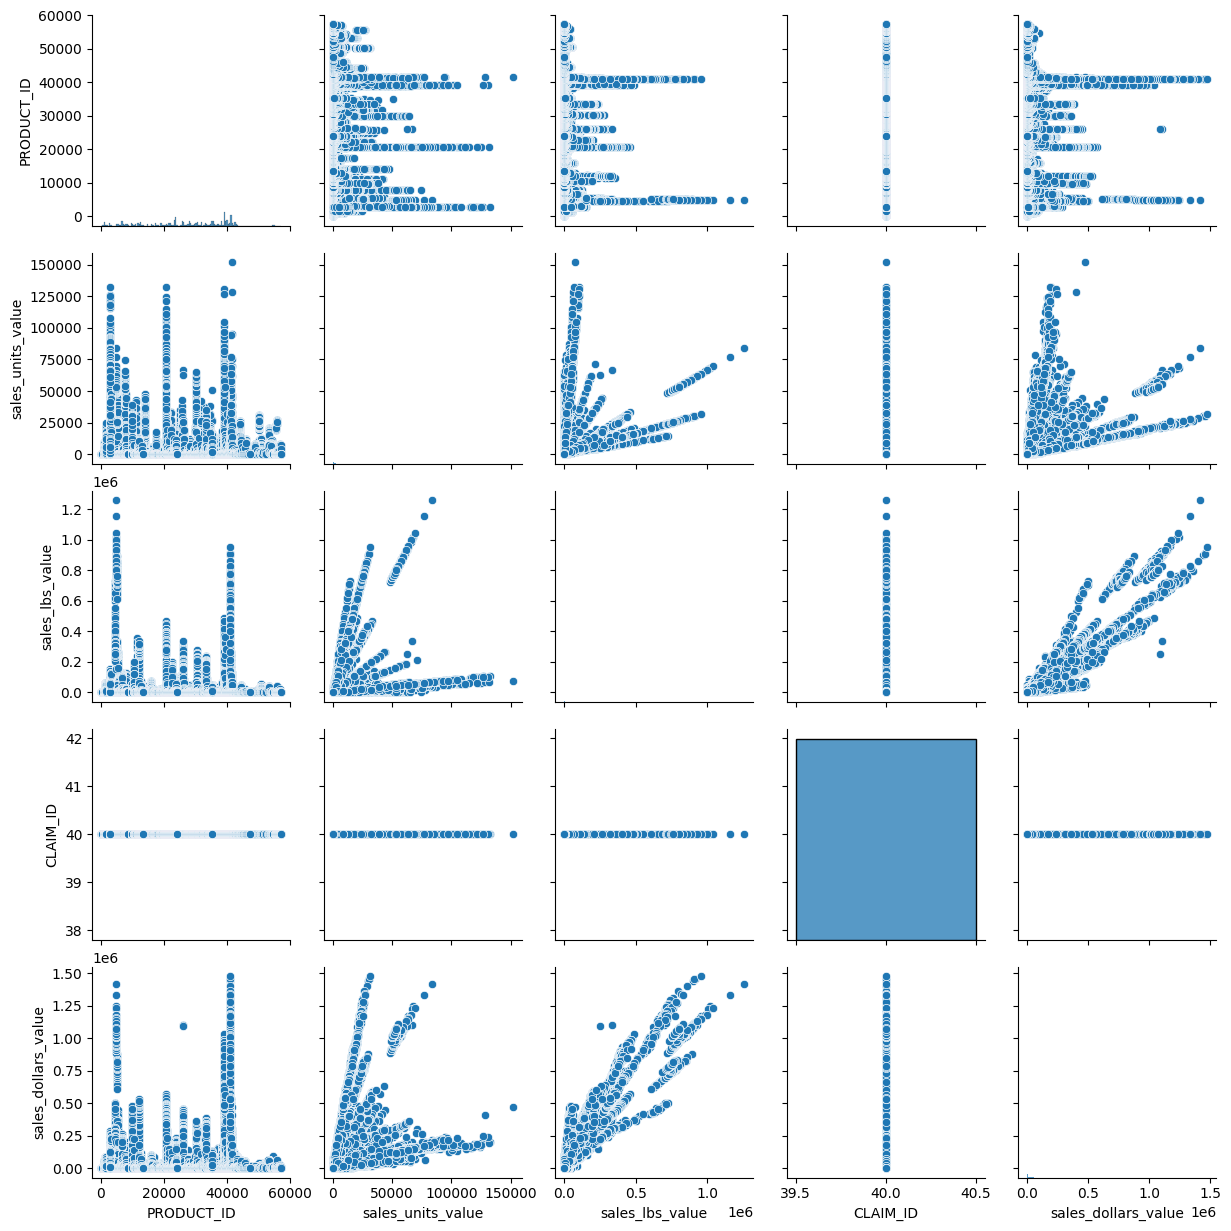

In [117]:
sns.pairplot(base_dataset)

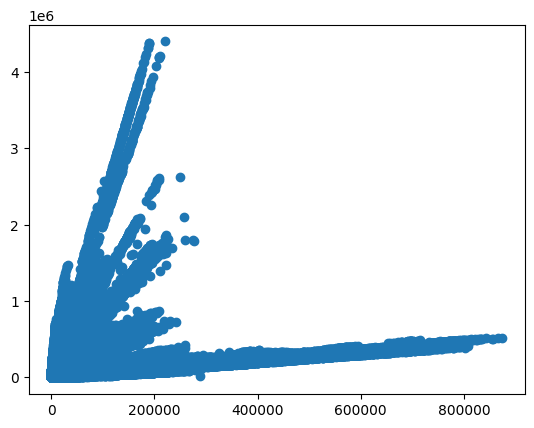

In [119]:
plt.scatter(base_dataset['sales_units_value'],base_dataset['sales_dollars_value'])

In [157]:
cat=[i for i in base_dataset.columns if i not in base_dataset.describe().columns]

In [158]:
cat

['Vendor']

In [159]:
base_dataset['Vendor'].unique()

array(['A', 'Others', 'B', 'Private Label', 'D', 'F', 'H'], dtype=object)

In [119]:
###
Others -0
A- 1
Priv - 2
B - 3

NameError: name 'Others' is not defined

In [160]:
base_dataset['Vendor'].nunique()

7

In [161]:
# Label Encoders
from sklearn.preprocessing import LabelEncoder
#0
def label_encoders(data,cat):
    le=LabelEncoder()
    for i in cat:
        le.fit(data[i])
        x=le.transform(data[i])
        data[i]=x
    return data

In [162]:
base_data_label_encoded=label_encoders(base_dataset,cat)

In [163]:
base_data_label_encoded.head(2)

,PRODUCT_ID,sales_units_value,sales_lbs_value,Vendor,CLAIM_ID,sales_dollars_value
209,11356,9780,322728,0,40,411793.00
217,11357,2884,51911,0,40,91169.00


In [164]:
base_data_label_encoded.shape

(826406, 6)

In [165]:
base_data_label_encoded['Vendor'].unique()

array([0, 5, 1, 6, 2, 3, 4])

In [166]:
base_data_label_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 826406 entries, 209 to 7767387
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   PRODUCT_ID           826406 non-null  int64  
 1   sales_units_value    826406 non-null  int64  
 2   sales_lbs_value      826406 non-null  int64  
 3   Vendor               826406 non-null  int32  
 4   CLAIM_ID             826406 non-null  int64  
 5   sales_dollars_value  826406 non-null  float64
dtypes: float64(1), int32(1), int64(4)
memory usage: 41.0 MB


In [167]:
x=base_data_label_encoded.drop('sales_dollars_value',axis=1)
y=base_data_label_encoded['sales_dollars_value']

In [168]:
x.head(2)

,PRODUCT_ID,sales_units_value,sales_lbs_value,Vendor,CLAIM_ID
209,11356,9780,322728,0,40
217,11357,2884,51911,0,40


In [169]:
y.head(2)

209   411793.00
217    91169.00
Name: sales_dollars_value, dtype: float64

In [170]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [171]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(619804, 5) (206602, 5) (619804,) (206602,)


In [172]:
from sklearn.linear_model import LinearRegression
ln=LinearRegression()
ln.fit(X_train,y_train)
ln.predict(X_test)

array([ 4512.55413741, 34127.12313751,  3902.79553799, ...,
       31654.17545976,  8072.69842581,  6668.94937788])

In [173]:
abs(y_test.values-ln.predict(X_test)).sum()

1643705300.4017868

In [174]:
from sklearn.linear_model import Lasso
ls=Lasso()
ls.fit(X_train,y_train)
ls.predict(X_test)

abs(y_test.values-ls.predict(X_test)).sum()

1643712591.722952

In [175]:
from sklearn.linear_model import Ridge
rd=Ridge()
rd.fit(X_train,y_train)
rd.predict(X_test)

abs(y_test.values-rd.predict(X_test)).sum()

1643705307.589934

### Model Validation

In [176]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [177]:
validation_table=[]
for i in [LinearRegression,Lasso,Ridge]:
    rd=i()
    rd.fit(X_train,y_train)
    rd.predict(X_test)
    mae=mean_absolute_error(y_test.values,rd.predict(X_test))
    mse=mean_squared_error(y_test.values,rd.predict(X_test))
    rmse=np.sqrt(mean_squared_error(y_test.values,rd.predict(X_test)))
    mape=(((abs(y_test.values-rd.predict(X_test))/y_test.values)*100).sum())*(1/y_test.shape[0])
    rsquare=r2_score(y_test.values,rd.predict(X_test))
    validation_table.append([i,mae,mse,rmse,mape,rsquare])

C:\Users\APPLE\AppData\Local\Temp\ipykernel_9872\1946313057.py:9: RuntimeWarning: divide by zero encountered in divide
  mape=(((abs(y_test.values-rd.predict(X_test))/y_test.values)*100).sum())*(1/y_test.shape[0])
C:\Users\APPLE\AppData\Local\Temp\ipykernel_9872\1946313057.py:9: RuntimeWarning: divide by zero encountered in divide
  mape=(((abs(y_test.values-rd.predict(X_test))/y_test.values)*100).sum())*(1/y_test.shape[0])
C:\Users\APPLE\AppData\Local\Temp\ipykernel_9872\1946313057.py:9: RuntimeWarning: divide by zero encountered in divide
  mape=(((abs(y_test.values-rd.predict(X_test))/y_test.values)*100).sum())*(1/y_test.shape[0])


In [178]:
validation_table=pd.DataFrame(validation_table)

In [179]:
validation_table.columns=["model name","mae","mse","rmse","mape","rsquare"]

In [180]:
validation_table

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.linear_model._base.LinearRegre...,7955.90,314048669.36,17721.42,inf,0.86
1,<class 'sklearn.linear_model._coordinate_desce...,7955.94,314048786.54,17721.42,inf,0.86
2,<class 'sklearn.linear_model._ridge.Ridge'>,7955.90,314048669.47,17721.42,inf,0.86


In [181]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

In [182]:
def model_validation(x):
    if x=="train":
        validation_table_train=[]
        models=[LinearRegression,Lasso,Ridge,DecisionTreeRegressor,RandomForestRegressor,BaggingRegressor]
        for i in models:
            rd=i()
            rd.fit(X_train,y_train)
            rd.predict(X_train)
            mae=mean_absolute_error(y_train.values,rd.predict(X_train))
            mse=mean_squared_error(y_train.values,rd.predict(X_train))
            rmse=np.sqrt(mean_squared_error(y_train.values,rd.predict(X_train)))
            mape=(((abs(y_train.values-rd.predict(X_train))/y_train.values)*100).sum())*(1/y_train.shape[0])
            rsquare=r2_score(y_train.values,rd.predict(X_train))
            validation_table_train.append([i,mae,mse,rmse,mape,rsquare])
        validation_table_train=pd.DataFrame(validation_table_train)
        validation_table_train.columns=["model name","mae","mse","rmse","mape","rsquare"]
        validation_table_train
        return validation_table_train
    else:
        validation_table=[]
        models=[LinearRegression,Lasso,Ridge,DecisionTreeRegressor,RandomForestRegressor,BaggingRegressor]
        for i in models:
            rd=i()
            rd.fit(X_train,y_train)
            rd.predict(X_test)
            mae=mean_absolute_error(y_test.values,rd.predict(X_test))
            mse=mean_squared_error(y_test.values,rd.predict(X_test))
            rmse=np.sqrt(mean_squared_error(y_test.values,rd.predict(X_test)))
            mape=(((abs(y_test.values-rd.predict(X_test))/y_test.values)*100).sum())*(1/y_test.shape[0])
            rsquare=r2_score(y_test.values,rd.predict(X_test))
            validation_table.append([i,mae,mse,rmse,mape,rsquare])
        validation_table=pd.DataFrame(validation_table)
        validation_table.columns=["model name","mae","mse","rmse","mape","rsquare"]
        return validation_table

In [183]:
pd.options.display.float_format='{:0.2f}'.format

In [184]:
model_validation("train")

C:\Users\APPLE\AppData\Local\Temp\ipykernel_9872\3325111636.py:12: RuntimeWarning: divide by zero encountered in divide
  mape=(((abs(y_train.values-rd.predict(X_train))/y_train.values)*100).sum())*(1/y_train.shape[0])
C:\Users\APPLE\AppData\Local\Temp\ipykernel_9872\3325111636.py:12: RuntimeWarning: divide by zero encountered in divide
  mape=(((abs(y_train.values-rd.predict(X_train))/y_train.values)*100).sum())*(1/y_train.shape[0])
C:\Users\APPLE\AppData\Local\Temp\ipykernel_9872\3325111636.py:12: RuntimeWarning: divide by zero encountered in divide
  mape=(((abs(y_train.values-rd.predict(X_train))/y_train.values)*100).sum())*(1/y_train.shape[0])
C:\Users\APPLE\AppData\Local\Temp\ipykernel_9872\3325111636.py:12: RuntimeWarning: divide by zero encountered in divide
  mape=(((abs(y_train.values-rd.predict(X_train))/y_train.values)*100).sum())*(1/y_train.shape[0])
C:\Users\APPLE\AppData\Local\Temp\ipykernel_9872\3325111636.py:12: RuntimeWarning: invalid value encountered in divide
  map

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.linear_model._base.LinearRegre...,7976.69,318400367.40,17843.78,inf,0.86
1,<class 'sklearn.linear_model._coordinate_desce...,7976.72,318400367.75,17843.78,inf,0.86
2,<class 'sklearn.linear_model._ridge.Ridge'>,7976.69,318400367.40,17843.78,inf,0.86
3,<class 'sklearn.tree._classes.DecisionTreeRegr...,16.14,12810.81,113.18,NaN,1.00
4,<class 'sklearn.ensemble._forest.RandomForestR...,286.53,1002132.18,1001.07,NaN,1.00
5,<class 'sklearn.ensemble._bagging.BaggingRegre...,311.69,1351151.43,1162.39,NaN,1.00


In [185]:
model_validation("test")

C:\Users\APPLE\AppData\Local\Temp\ipykernel_9872\3325111636.py:29: RuntimeWarning: divide by zero encountered in divide
  mape=(((abs(y_test.values-rd.predict(X_test))/y_test.values)*100).sum())*(1/y_test.shape[0])
C:\Users\APPLE\AppData\Local\Temp\ipykernel_9872\3325111636.py:29: RuntimeWarning: divide by zero encountered in divide
  mape=(((abs(y_test.values-rd.predict(X_test))/y_test.values)*100).sum())*(1/y_test.shape[0])
C:\Users\APPLE\AppData\Local\Temp\ipykernel_9872\3325111636.py:29: RuntimeWarning: divide by zero encountered in divide
  mape=(((abs(y_test.values-rd.predict(X_test))/y_test.values)*100).sum())*(1/y_test.shape[0])
C:\Users\APPLE\AppData\Local\Temp\ipykernel_9872\3325111636.py:29: RuntimeWarning: divide by zero encountered in divide
  mape=(((abs(y_test.values-rd.predict(X_test))/y_test.values)*100).sum())*(1/y_test.shape[0])
C:\Users\APPLE\AppData\Local\Temp\ipykernel_9872\3325111636.py:29: RuntimeWarning: invalid value encountered in divide
  mape=(((abs(y_test.

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.linear_model._base.LinearRegre...,7955.90,314048669.36,17721.42,inf,0.86
1,<class 'sklearn.linear_model._coordinate_desce...,7955.94,314048786.54,17721.42,inf,0.86
2,<class 'sklearn.linear_model._ridge.Ridge'>,7955.90,314048669.47,17721.42,inf,0.86
3,<class 'sklearn.tree._classes.DecisionTreeRegr...,894.37,9562877.48,3092.39,NaN,1.00
4,<class 'sklearn.ensemble._forest.RandomForestR...,762.15,6113077.50,2472.46,NaN,1.00
5,<class 'sklearn.ensemble._bagging.BaggingRegre...,797.48,6612189.79,2571.42,NaN,1.00


In [ ]:
# Apply a normal linear regression
linearreg = LinearRegression()
linearreg.fit(X_train, y_train)

# predicting on test
linearreg_prediction = linearreg.predict(X_test)

# calculating R_square
R_squared = r2_score(linearreg_prediction,y_test)
print("R squared Error on test set : ", R_squared)


# Putting together the coefficient and their corresponding variable names
coefficient_df = pd.DataFrame()
coefficient_df["Column_Name"] = X_train.columns
coefficient_df['Coefficient_Value'] = pd.Series(linearreg.coef_)
print(coefficient_df.head())

plt.rcParams["figure.figsize"] = (15,6)
 
plt.bar(coefficient_df["Column_Name"],coefficient_df["Coefficient_Value"])

R squared Error on test set :  0.6724083248370072
         Column_Name  Coefficient_Value
0         PRODUCT_ID              -0.03
1  sales_units_value               0.55
2    sales_lbs_value               0.47
3             Vendor           -2400.42
4           CLAIM_ID              53.56


<BarContainer object of 5 artists>

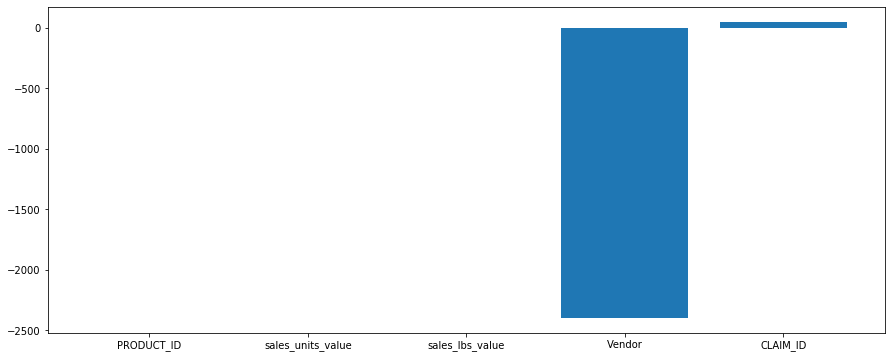

In [131]:
# import ridge regression library
from sklearn.linear_model import Ridge

# Train the model
ridgeRegressor = Ridge(alpha = 0.5) #here setting alpha is nothing but lambda in the formula
ridgeRegressor.fit(X_train, y_train)
y_predicted_ridge = ridgeRegressor.predict(X_test)

# calculating R_square
R_squared = r2_score(y_predicted_ridge,y_test)
print("R squared Error on test set : ", R_squared)


# Putting together the coefficient and their corresponding variable names
coefficient_df = pd.DataFrame()
coefficient_df["Column_Name"] = X_train.columns
coefficient_df['Coefficient_Value'] = pd.Series(ridgeRegressor.coef_)
print(coefficient_df.head(15))

plt.rcParams["figure.figsize"] = (15,6)
 
plt.bar(coefficient_df["Column_Name"],coefficient_df["Coefficient_Value"])

In [ ]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

# Train the model
lassoRegressor = Lasso(alpha = 1) #here setting alpha is nothing but lambda in the formula
lassoRegressor.fit(X_train, y_train)
y_predicted_lasso = lassoRegressor.predict(X_test)

# calculating Mean Squared Error (mse)
R_squared = r2_score(y_predicted_lasso,y_test)
print("R squared Error on test set : ", R_squared)


# Putting together the coefficient and their corresponding variable names
coefficient_df = pd.DataFrame()
coefficient_df["Column_Name"] = X_train.columns
coefficient_df['Coefficient_Value'] = pd.Series(lassoRegressor.coef_)
print(coefficient_df.head(15))

plt.rcParams["figure.figsize"] = (15,6)
 
plt.bar(coefficient_df["Column_Name"],coefficient_df["Coefficient_Value"])

In [ ]:
# Linear Regression with cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,x,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

In [ ]:
## Hyper Prameter Tuning

In [136]:
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [137]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-1337283413.8355427


In [138]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(x,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\gn221m\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.377e+15, tolerance: 1.930e+12
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\gn221m\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.413e+15, tolerance: 1.978e+12
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\gn221m\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increa

KeyboardInterrupt: 

#### Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
def StandardScaler(data):
    le=StandardScaler()
    le.fit(data)
    x=le.transform(data)
    dat1=pd.DataFrame(x)
    dat1.columns=data.columns
    data=data1
    return data

#### Pls find below git hub link for another project on linear regression

######    https://github.com/NagendraProjects/Forecast_Regression

##### By using above project in github, we will deploy the model